# **Lecture 10. Dual Formulation of Support Vector Machine**
## **Applied Machine Learning**

## **Part 1: Lagrange Duality**

In this lecture, we are going to continue discuss about Support Vector Machines (SVMs), and define a new formulation of the max-margin problem.

Before we do that, we start with a general concept -- Lagrange Duality

### **Review: Maximizing the Margin**
We saw that maximizing the margin of linear model amounts to solving the following optimization

\begin{align*}
\min_{\theta,\theta_0} \frac{1}{2}||\theta||^2 \; &  \\
\text{subject to } \; & y^{(i)}((x^{(i)})^\top\theta+\theta_0)\geq 1 \; \text{for all $i$}
\end{align*}

We are going to look a different way of optimizing this objective. But first, we start by defining Lagrange Duality.


### **Constrained Optimization problems**

We will look at optimization problems of the form 

\begin{align*}
\min_{\theta \in \mathbb{R}^d} J(\theta) \; &  \\
\text{such that } \; & c_k(\theta) \leq 0 \; \text{for} \; k = 1,2,\dots,K.
\end{align*}

where $J(\theta)$ is an optimization objective and each $c_k(\theta): \mathbb{R}^d \to \mathbb{R}$ is a constraint.

Our goal is to find a small value of $J(\theta)$ such that $c_k(\theta)$ are negative.


### **Optimization with Penalties**
Another way of approaching the above goal is via:
$$\min_{\theta}\mathcal{L}(\theta, \lambda) = J(\theta) + \sum_{k=1}^K\lambda_kc_k(\theta)$$

for some positive vector of *Lagrange multipliers* $\lambda \in [0,∞)^K$. We call $\mathcal{L}(\theta,\lambda)$ is the Lagrangian.

* If $\lambda_k \geq 0$, then we penalize the large values of $c_k$,
* For large enough $\lambda_k$, no $c_k$ will be positive -- a valid solution.

Penalties is another way of enforcing constraints.

### **Penalties Vs. Constraints**

Penalties and constraints are closely related. Consider our constrained optimization problem:

\begin{align*}
\min_{\theta \in \mathbb{R}^d} J(\theta) \; &  \\
\text{such that } \; & c_k(\theta) \leq 0 \; \text{for} \; k = 1,2,\dots,K.
\end{align*}

We define it *primal Lagrange form* is:

$$\min_{\theta \in \mathbb{R}^d}\mathcal{P}(\theta) = \min_{\theta \in \mathbb{R}^d}\max_{\lambda \geq 0}\mathcal{L}(\theta,\lambda) = \min_{\theta \in \mathbb{R}^d}\max_{\lambda \geq 0}\left(J(\theta) + \sum_{k=1}^K\lambda_kc_k(\theta)\right)$$

These two forms have the same optimum $\theta^*$!

Why is this true? Consider again

$$\min_{\theta \in \mathbb{R}^d}\mathcal{P}(\theta) = \min_{\theta \in \mathbb{R}^d}\max_{\lambda \geq 0}\mathcal{L}(\theta,\lambda) = \min_{\theta \in \mathbb{R}^d}\max_{\lambda \geq 0}\left(J(\theta) + \sum_{k=1}^K\lambda_kc_k(\theta)\right)$$

* If a $c_k$ is violated ($c_k > 0$) then $\max_{\lambda \geq 0}\mathcal{L}(\theta, \lambda)\; \text{is} \; \infty\; \text{as} \; \lambda \to ∞$.
* If no $c_k$ is violated and $c_k < 0$ then the optimal $\lambda_k = 0$ (any other values make the objective smaller).
 * If $c_k < 0$ for all $k$ then $\lambda_k = 0$ for all $k$ and 
 $$\min_{\theta \in \mathbb{R}^d}\mathcal{P}(\theta) = \min_{\theta \in \mathbb{R}^d}\max_{\lambda \geq 0}\mathcal{L}(\theta,\lambda) = \min_{\theta \in \mathbb{R}^d}J(\theta).$$

 Thus, $\min_{\theta \in \mathbb{R}^d}\mathcal{P}(\theta)$ is the solution to our initial optimization problem.

### **Lagrange Dual**
Now consider the following problem for $\lambda \geq 0$:
$$\max_{\lambda \geq 0}\mathcal{D}(\lambda) = \max_{\lambda \geq 0}\min_{\theta \in \mathbb{R}^d}\mathcal{L}(\theta,\lambda) = \max_{\lambda \geq 0}\min_{\theta \in \mathbb{R}^d}\left(J(\theta) + \sum_{k=1}^K\lambda_kc_k(\theta)\right).$$

We call this the *Lagrange Dual* of the primal optimization problem $\min_{\theta \in \mathbb{R}^d}\mathcal{P}(\theta)$. We can always construct a dual for the primal.
 



### **Lagrange Duality**
The dual interesting as we always have:
$$\max_{\lambda \geq 0}\mathcal{D}(\lambda) = \max_{\lambda \geq 0}\min_{\theta \in \mathbb{R}} \leq \min_{\theta \in \mathbb{R}^d}\max_{\lambda \geq 0}\mathcal{L}(\theta,\lambda) = \min_{\theta \in \mathbb{R}^d}\mathcal{P}(\theta).$$

 Moreover, in many interesting cases, we have 
 $$\max_{\lambda \geq 0}\mathcal{D}(\lambda) = \min_{\theta \in \mathbb{R}^d}\mathcal{P}(\theta).$$

 Thus, the primal and the dual are equivalent!

### **Example: Regularization**
Consider regularized supervised learning problem with the penalty term:
$$\min_{\theta \in \Theta}\mathcal{L}(\theta) + \lambda \cdot R(\theta).$$

We may also enforce an explicit constraint on the complexity of the model:

\begin{align*}
\min_{\theta \in \Theta}\mathcal{L}(\theta) \; & \\
\text{such that} \; R(\theta) &\leq \lambda'
\end{align*}

We will not prove this, but solving this problem is equivalent to solving the penalized the problem for some $\lambda \geq 0$ that is different form $\lambda'$.

In other words, we can regularize by explicitly enforcing $R(\theta)$ to be less than a value or we can penalize the $R(\theta)$.

We are going to see another application of Lagrangians in the context of SVMs.

## **Part 2: Duals Formulation of SVMs**

Let's now apply the Lagrange Duality to support vector machines.

### **Review: Binary Classification**

Consider a training dataset $\mathcal{D}$.

We distinguish between two types of supervised machine learning problems depending on the target $y^{(i)}$:
* **Regression**: The target variable $y \in \mathcal{Y}$ is continuous: $\mathcal{Y} \in \mathbb{R}$
* **Binary Classification**: The target variable $y \in \mathcal{Y}$ is discrete and takes on one of the $K=2$ possible values in $\mathcal{Y} = \{-1,+1\}$. 



### **Review: Linear Model Family**

In this lecture, we will work linear model of the form:
$$f_{\theta}(x) = \theta_0 + \theta_1x_1 + \theta_2x_2 + \dots + \theta_dx_d$$

where $x \in \mathbb{R}^d$ is a vector of features and $y \in \{-1,+1\}$ is the target. The $\theta_j$ are the parameters of the model.

We can represent the model in the vectorized form:
$$f_{\theta}(x) = \theta^\top x + \theta_0$$

### **Review: Geometric Margins**

We define the geometric margins $\gamma^{(i)}$ with respect to training example $(x^{(i)}, y^{(i)})$ as
$$\gamma^{(i)} = y^{(i)} \left(\frac{\theta^\top x + \theta_0}{\|\theta\|}\right)$$

This also corresponds to the distance from $x^{(i)}$ to the hyperplane. 

### **Review: MAximizing the Margins**

We saw that maximizing the margins of the linear models amounts to solving the following optimization:

\begin{align*}
&\min_{\theta,\theta_0}\frac{1}{2}\|\theta\|^2 \;  \\
&\text{subject to } \; y^{(i)}((x^{(i)})^\top \theta + \theta_0) \geq 1 \; \text{for all} \; i
\end{align*}

We are going to look at a different way to optimizing this objective. But first, we start by defining the Lagrange Duality.

### **Review: Penalties Vs. Constraints**

Penalties and constraints are closely related. Consider our constrained optimization problem

\begin{align*}
&\min_{\theta \in \mathbb{R}^d}J(\theta)  \\
&\text{such that } c_k(\theta) \leq 0 \; \text{for} \; k = 1,2,\dots,K.
\end{align*}

We define its *primal Lagrange form* to be:

$$\min_{\theta \in \mathbb{R}^d}\mathcal{P}(\theta) = \min_{\theta \in \mathbb{R}^d}\max_{\lambda \geq 0}\mathcal{L}(\theta,\lambda) = \min_{\theta \in \mathbb{R}^d}\max_{\lambda \geq 0}\left(J(\theta) + \sum_{k=1}^K\lambda_kc_k(\theta)\right)$$

These two forms have the same optimum $\theta^*$!

### **The Lagrangian of the SVM problem**
Consider the following objective, the Lagrangian of the max-margin optimization problem.
$$L(\theta,\theta_0,\lambda) = \frac{1}{2}\|\theta\|^2 + \sum_{i=1}^n\lambda_i\left(1 - y^{(i)}((x^{(i)})^\top\theta + \theta_0)\right)$$

Intuitively, we have put each constraint inside the objective function and added a penalty $\lambda_i$ to it.

### **Review: Lagrange Dual**
Consider the following problem over $\lambda \geq 0$:
$$\max_{\lambda \geq 0}\mathcal{D}(\lambda) = \max_{\lambda \geq 0}\min_{\theta \in \mathbb{R}^d}\mathcal{L}(\theta,\lambda) =  \max_{\lambda \geq 0}\min_{\theta \in \mathbb{R}^d} \left(J(\theta) + \sum_{k=1}^K\lambda_kc_k(\theta)\right).$$

We call this the *Lagrange dual* of the primal optimization problem $\min_{\theta \in \mathbb{R}^d}\mathcal{P}(\theta)$. We can always construct a dual for the primal.

### **The Dual of the SVM problem**

Consider optimizing the above Lagrangian over $\theta, \theta_0$ for any value of $\lambda$

$$\min_{\theta,\theta_0}L(\theta,\theta_0,\lambda) = \min_{\theta,\theta_0}\left(\frac{1}{2}\|\theta\|^2 + \sum_{k=1}^n \lambda_i(1 - y^{(i)}((x^{(i)})^\top\theta + \theta_0)) \right)$$

This objective is quadratic in $\theta$; hence it has a single minimum in $\theta$.

We can find it by setting the derivative to zero and solving for $\theta, \theta_0$. This yields:

\begin{align*}
&\theta = \sum_{i=1}^n\lambda_iy^{(i)}x^{(i)} \\
& 0 = \sum_{i=1}^n\lambda_iy^{(i)}
\end{align*}

Substituting this to the Lagrangian we obtain:
$$L(\lambda) = \min_{\theta,\theta_0}L(\theta,\theta_0,\lambda) = \sum_{i=1}^n\lambda_i - \frac{1}{2}\sum_{i=1}^n\sum_{k=1}^n\lambda_i\lambda_ky^{(i)}y^{(k)}(x^{(i)})^\top x^{(k)}$$

as well as $0 = \sum_{i=1}^n\lambda_iy^{(i)}$ and $\lambda \geq 0$ for all $i$.

SUbstituting this to the Lagrangian we obtain the following expression for the dual $\max_{\lambda \geq 0}\mathcal{D}(\lambda) = \max_{\lambda \geq 0} \min_{\theta,\theta_0}L(\theta,\theta_0,\lambda):$

\begin{align*}
\max_{\lambda \geq 0}\sum_{i=1}^n\lambda_i - &\frac{1}{2}\sum_{i=1}^n\sum_{k=1}^n\lambda_i\lambda_ky^{(i)}y^{(k)}(x^{(i)})^\top x^{(k)} \\
\text{subjected to} \; &0 = \sum_{i=1}^n\lambda_iy^{(i)} \\
&\lambda_i \geq 0 \; \text{for all} \; i
\end{align*}

### **Lagrange Duality in SVMs**
Recall that in general, we have:
$$\max_{\lambda \geq 0}\mathcal{D}(\lambda) = \max_{\lambda \geq 0}\min_{\theta \in \mathbb{R}^d} \leq \min_{\theta \in \mathbb{R}^d}\max_{\lambda \geq 0} = \min_{\theta \in \mathbb{R}^d}\mathcal{P}(\theta)$$.

In the case of SVM problem, one can show that
$$\max_{\lambda \geq 0}\mathcal{D}(\lambda) = \min_{\theta \in \mathbb{R}^d}\mathcal{P}(\theta).$$

Thus, the primal and the dual are equivelant!

### **Properties of the Dual**

We can make several observations about the Dual

\begin{align*}
\max_{\lambda \geq 0}\sum_{i=1}^n\lambda_i - &\frac{1}{2}\sum_{i=1}^n\sum_{k=1}^n\lambda_i\lambda_ky^{(i)}y^{(k)}(x^{(i)})^\top x^{(k)} \\
\text{subjected to} \; &0 = \sum_{i=1}^n\lambda_iy^{(i)} \\
&\lambda_i \geq 0 \; \text{for all} \; i
\end{align*}

* This is the constrained quadratic optimization problem.
* The number of parameters $\lambda$, equals $n$, the number of data points.
* Objective only depends on product $(x^{(i)})^\top x^{(j)}$.

### **When to Solve the Dual**

When should we be solving the dual or the primal?
* The dimensionality of the primal depends on the number of features. If we have a few features and  many data points, we should use the primal.
* Conversely, if we have a lot of features, but less datapoints, we want to use the dual.

In the next lecture, we will see how to use this property to solve machine learning problems with a very large number of features (even posibly infinite!).

## **Part 3: Practical Considerations for SVM Duals**

We continue our discussion of the dual formulation of the SVM with additional practical details about the dual formulation is defined and used.

### **Review: Primal and Dual Formulations**

Recall that the max-margin hyperplane can be formulated as the solution to the following *primal* optimization problem

\begin{align*}
\min_{\theta,\theta_0} \frac{1}{2}||\theta||^2 \; &  \\
\text{subject to } \; & y^{(i)}((x^{(i)})^\top\theta+\theta_0)\geq 1 \; \text{for all $i$}
\end{align*}

The solution to this problem also happens to given by the following *dual* problem
\begin{align*}
\max_{\lambda} & \sum_{i=1}^n \lambda_i - \frac{1}{2} \sum_{i=1}^n \sum_{k=1}^n \lambda_i \lambda_k y^{(i)} y^{(k)} (x^{(i)})^\top x^{(k)}  \\
\text{subject to } \; & \sum_{i=1}^n \lambda_i y^{(i)} = 0 \\
& \lambda_i \geq 0 \; \text{for all $i$}
\end{align*}

### **Review: Non-Separable Problem**

Our dual problem assumes that a linear hyperplane exists. However, what if the classes are non-separable? Then our optimization problem does not have a solution and we need to modify it!

Our solution is going to be make each constraint "soft", by introducing "slack" variables, which allow the constraint to be violated.

$$y^{(i)}((x^{(i)})^\top\theta + \theta_0) \geq 1 - \xi_i.$$

In the optimization problem, we assign a penalty $C$ to these slack variables to obtain:

\begin{align*}
\min_{\theta,\theta_0,\xi}&\frac{1}{2}\|\theta\|^2 + C \sum_{i=1}^n\xi_i \\
\text{subjected to} \; &y^{(i)}((x^{(i)})^\top\theta + \theta_0) \geq 1 - \xi_i \; \text{for all} \; i \\
& \xi_i \geq 0
\end{align*}

This is the primal problem. Let's form the dual!

### **Non-Separable Dual**

We can also formulate the dual to this problem. First, the Lagrangian $L(\lambda, \mu, \theta, \theta_0)$ equals:
$$\frac{1}{2}\|\theta\|^2 + C\sum_{i=1}^n\xi_i - \sum_{i=1}^n\lambda_i\left(y^{(i)}((x^{(i)})^\top\theta + \theta_0) - 1\right) - \sum_{i=1}^n\mu_i\xi_i.$$ 

The dual objective of this problem will equal:
$\mathcal{D}(\lambda, \mu) = \min_{\lambda,\mu}L(\lambda, \mu, \theta, \theta_0).$

As earlier, we can solve for the optimal $\theta, theta_0$ in closed form and plug back the results into the objective.

We can then show that the dual takes the following form:

\begin{align*}
\max_{\lambda} & \sum_{i=1}^n \lambda_i - \frac{1}{2} \sum_{i=1}^n \sum_{k=1}^n \lambda_i \lambda_k y^{(i)} y^{(k)} (x^{(i)})^\top x^{(k)}  \\
\text{subject to } \; & \sum_{i=1}^n \lambda_i y^{(i)} = 0 \\
& C \geq \lambda_i \geq 0 \; \text{for all $i$}
\end{align*}

### **Coordinate Descent**

Coordinate descent is a general way to optimize functions $f(x)$ of multiple variable $x \in \mathbb{R}^d$:
1. Choose a dimension $j \in \{1,2,\dots,d\}$
2. Optimize $f(x_1,x_2,\dots,x_j,\dots,x_d)$ over $x_j$ while keeping the other variables fixed.

Here we visualize the coordinate descent applied to a 2D quadratic function
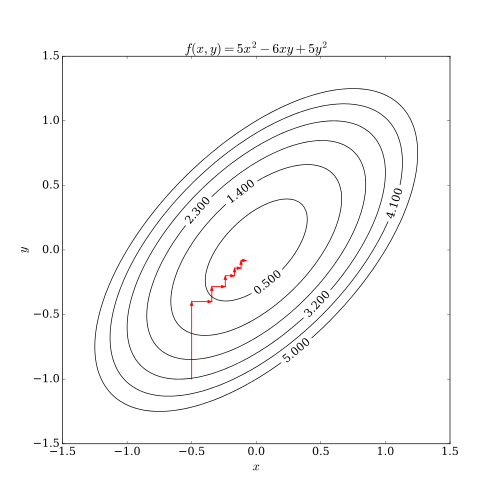

The red line show the trajectory of coordinate descent. Each "step" in the trajectory is an iteration in the algorithm.

### **Sequential Minimal Optimization**
We can apply a form of coordinante descent the solve the dual:
\begin{align*}
\max_{\lambda} & \sum_{i=1}^n \lambda_i - \frac{1}{2} \sum_{i=1}^n \sum_{k=1}^n \lambda_i \lambda_k y^{(i)} y^{(k)} (x^{(i)})^\top x^{(k)}  \\
\text{subject to } \; & \sum_{i=1}^n \lambda_i y^{(i)} = 0 \\
& C \geq \lambda_i \geq 0 \; \text{for all $i$}
\end{align*}

A popular, efficient algorithm is Sequential Minimal optimization (SMO):
* Take a pair $\lambda_i, \lambda_j$, possibly using heuristic to guide choice of $i,j$.
* Reoptimize over $\lambda_i, \lambda_j$ while keeping the other variables fixed.
* Repeat the above until convergence.


### **Obtaining a Primal Solution from the Dual**

Next, assuming we can solve the dual. How do we find a hyperplane that separate $\theta, \theta_0$?

Recall that we have found the expression for the optimal $\theta^*$ (in a separate case) as a the function of $\lambda$
$$\theta^* = \sum_{i=1}^n \lambda_iy^{(i)}x^{(i)}.$$

Once we have found $\theta^*$, it is easy to check the solution for $\theta$ is given by 
$$\theta_0^* = \frac{\max_{i:y^{(i)}=-1}(\theta^*)^\top x^{(i)} + \min_{i:y^{(i)}=-1}(\theta^*)^\top x^{(i)}}{2}.$$



### **Support Vector Machine**

A powerful property of SVM dual is that at the optimum, most variables $\lambda$, are zeros! Thus, $\theta$ is a sum of small number of points:
$$\theta^* = \sum_{i=1}^n \lambda_iy^{(i)}x^{(i)}.$$
The points for which $\lambda_i > 0$ are precisely the points that lie on the margin (are closest to the hyperplane).

These are called **support vectors**

### **Notation and the Iris Dataset**
To demonstrate how to use the dual version of the SVM, we are going to again use the Iris flower dataset.

We will look at the binary classificaiton version of this dataset.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

# Load the dataset
iris = datasets.load_iris(as_frame=True)
iris_X, iris_y = iris.data, iris.target

# subsample to a third of the data points
iris_X = iris_X.loc[::4]
iris_y = iris_y.loc[::4]

# create a binary classification dataset with labels +/- 1
iris_y2 = iris_y.copy()
iris_y2[iris_y2==2] = 1
iris_y2[iris_y2==0] = -1

# print part of the dataset
pd.concat([iris_X, iris_y2], axis=1).head()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]
import warnings
warnings.filterwarnings("ignore")

# create 2d version of dataset and subsample it
X = iris_X.to_numpy()[:,:2]
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))

# Plot also the training points
p1 = plt.scatter(X[:, 0], X[:, 1], c=iris_y2, s=60, cmap=plt.cm.Paired)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(handles=p1.legend_elements()[0], labels=['Setosa', 'Not Setosa'], loc='lower right')

We can run the dual version of SVM by importing an implement from `sklearn`

In [ ]:
from sklearn import svm

# Fit the model, don't regularize for illustration purpose.
clf = svm.SVC(kernel='linear',C=1000) # this optimize the dual
#clf = svm.LinearSVC() # this optimize the primal
clf.fit(X,iris_y2)

plt.scatter(X[:,0], X[:,1], c=iris_y2, cmap=plt.cm.Paired, s=40, edgecolor='k')
Z = clf.decision_function(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)

# plot the decision boundary and margins
plt.contour(xx,yy,Z,levels=[-1,0,1],alpha=0.5,linestyles=['--','-','--'])
plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=100,
            linewidth=1, facecolors='none', edgecolors='k')
plt.xlim([4.6,6])
plt.ylim([2.25,4])
plt.show()

### **Algorithm: Support Vector Machine Classification (Dual Form)**

* **Type**: Supervised learning (binary classification)
* **Model Family**: Linear decision boundary
* **Opjective function**: Dual of SVM problem
* **Optimizer**: Sequential Minimal Optimization